<a href="https://colab.research.google.com/github/yd-14/HRNet-fundus-image-segmentation/blob/main/Image_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
# drive.flush_and_unmount()
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import cv2
from keras.utils import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def clahe_image(img):
    img = img.astype('uint8')
    img_rgb = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    lab_image = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2LAB)
    
    l, a, b = cv2.split(lab_image)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    clahe_lab_image = cv2.merge((cl, a, b))

    final_image = cv2.cvtColor(clahe_lab_image, cv2.COLOR_LAB2RGB)

    final_image = final_image.astype('float32')
    return final_image

def histo_equal(img):
    img = img.astype('uint8')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    equalized_image = cv2.equalizeHist(img)

    final_image = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)

    final_image = final_image.astype('float32')
    return final_image

def display(display_list):
  plt.figure(figsize=(15, 15))

  title = ['Input Image', 'Clahe Image', 'Histogram equalization Image']

  for i in range(len(display_list)):
    plt.subplot(1, len(display_list), i+1)
    plt.title(title[i])
    plt.imshow(tf.keras.utils.array_to_img(display_list[i]), cmap='gray')
    plt.axis('off')
  plt.show()


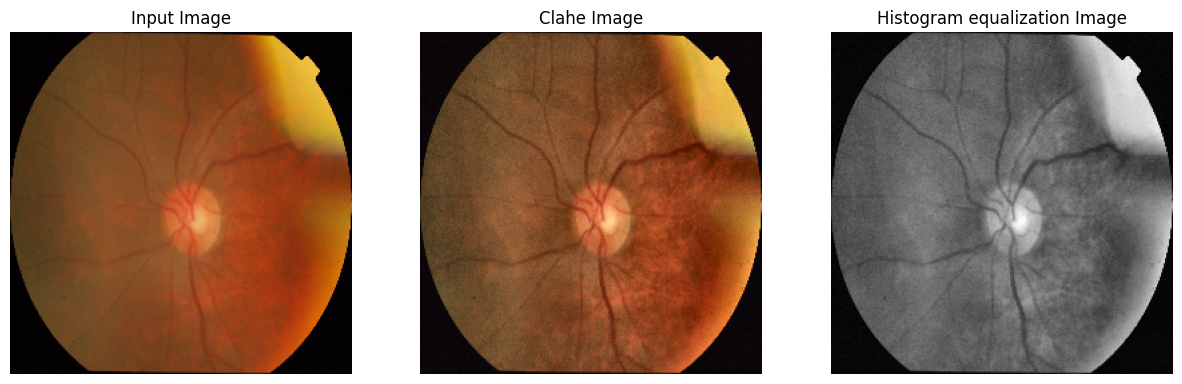

In [ ]:
img_dr = load_img('/content/gdrive/MyDrive/MiniProjectDataset/Drishti/images/normal/drishtiGS_008.png', target_size=(256, 256))
msk_OC_dr = load_img('/content/gdrive/MyDrive/MiniProjectDataset/Drishti/OC_gts/normal/drishtiGS_008_CupAvgBoundary_OC_img.png', target_size=(256, 256), color_mode='grayscale')
msk_OD_dr = load_img('/content/gdrive/MyDrive/MiniProjectDataset/Drishti/OD_gts/normal/drishtiGS_008_ODAvgBoundary_OD_img.png', target_size=(256, 256), color_mode='grayscale')

img_dr = img_to_array(img_dr)
msk_OC_dr=img_to_array(msk_OC_dr)
msk_OD_dr=img_to_array(msk_OD_dr)

display([img_dr, clahe_image(img_dr), histo_equal(clahe_image(img_dr))])

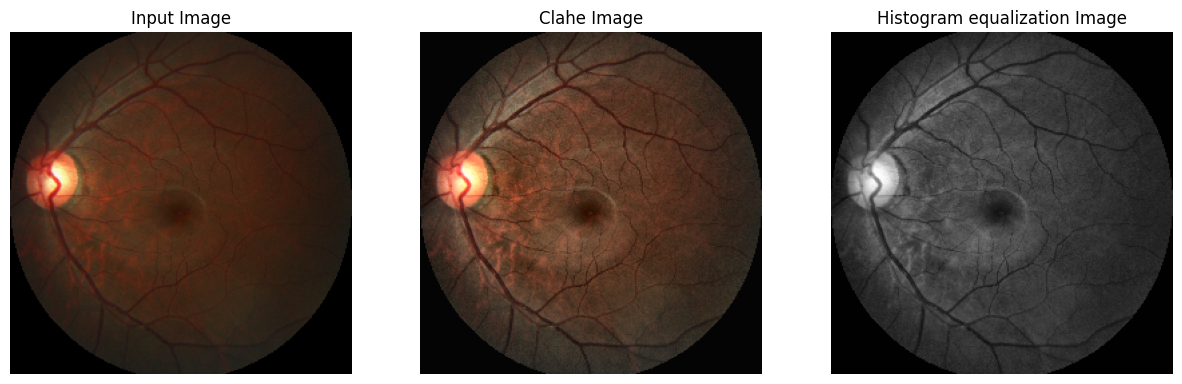

In [ ]:
img_re = load_img('/content/gdrive/MyDrive/MiniProjectDataset/Refuge/train/images/glaucoma/g0001.jpg', target_size=(256, 256))
msk_re = load_img('/content/gdrive/MyDrive/MiniProjectDataset/Refuge/train/gts/glaucoma/g0001.bmp', target_size=(256, 256), color_mode='grayscale')

img_re = img_to_array(img_re)
msk_re=img_to_array(msk_re)
msk_re=img_to_array(msk_re)
msk_OD_re=msk_re<255
msk_OC_re=msk_re==0

display([img_re, clahe_image(img_re), histo_equal(clahe_image(img_re))])